In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [79]:
dim_x = 9
dim_y = 10
def init_floor():
    floor_arr = np.zeros((dim_x, dim_y), dtype=int)
    floor_arr[0:3,:] = -1
    floor_arr[:,0] = -1
    floor_arr[3,0:3] = -1
    floor_arr[3,-2:] = -1
    return floor_arr

In [80]:
def plot_cave(floor, day):
    print('Day {}'.format(day))
    floor_fill = 1*(floor > 0)
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(floor_fill - (floor_arr == -1))
    ax[1].imshow(floor)
    plt.show()

In [81]:
def select_item():
    parentSheetIndex = 410
    r = np.random.randint(5)
    if r == 0:
        parentSheetIndex = 296
    elif r == 1:
        parentSheetIndex = 396
    elif r == 2:
        parentSheetIndex = 406
    elif r == 3:
        parentSheetIndex = 410
    elif r == 4:
        if np.random.rand() < 0.75:
            if np.random.rand() > 0.1:
                parentSheetIndex = np.random.randint(634, 639)
            else:
                parentSheetIndex = 613
    return parentSheetIndex

def is_tile_clear(floor, i, j):
    if floor[i, j] == 0:
        return True
    return False

def day_update(floor):
    while np.random.rand() < 0.5:
        item = select_item()
        loc_x = np.random.randint(dim_x)
        loc_y = np.random.randint(dim_y)
        if is_tile_clear(floor, loc_x, loc_y):
            floor[loc_x, loc_y] = item

Day 0


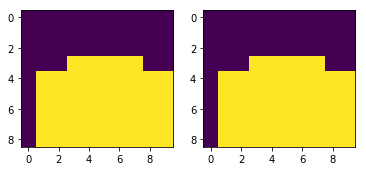

Day 2


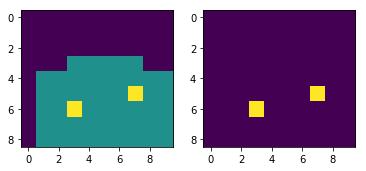

Day 7


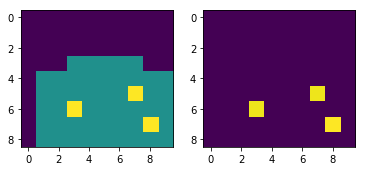

Day 9


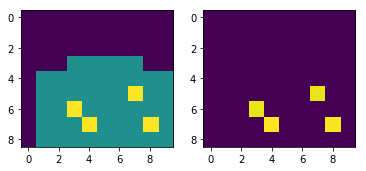

In [82]:
floor_arr = init_floor()
plot_cave(floor_arr, 0)
for i in range(1,11):
    floor_arr_old = floor_arr.copy()
    day_update(floor_arr)
    if not np.array_equal(floor_arr_old, floor_arr):
        plot_cave(floor_arr,i)

In [86]:
def simulate_harvest(days_to_harvest):
    floor_arr = init_floor()
    for i in range(days_to_harvest):
        day_update(floor_arr)
    items = {}
    for item in np.unique(floor_arr):
        if item == -1 or item == 0:
            continue
        items[item] = np.sum(floor_arr[:] == item)
    return items

In [188]:
item_list = [410,296,396,406,634,635,636,637,638,613]
n_trials = 1000000
n_days_harvest = 56
item_counts = np.zeros((n_days_harvest,len(item_list)))
for days in range(0,n_days_harvest):
    harvests = {410:0, 296:0, 396:0, 406:0, 634:0, 635:0, 636:0, 637:0, 638:0, 613:0}
    for n in range(n_trials):
        items = simulate_harvest(days+1)
        for idx,item in enumerate(item_list):
            try:
                item_counts[days, idx] = item_counts[days, idx] + items[item]/n_trials
            except:
                pass
    print('Harvest every {0} days, avg find:{1:.3f}, avg apple:{2:.3f} avg fruit:{3:.3f}'.format(
        days,
        sum(item_counts[days,:]),
        item_counts[days,-1],
        item_counts[days,-2]
    ))

Harvest every 0 days, avg find:0.549, avg apple:0.008 avg fruit:0.015
Harvest every 1 days, avg find:1.093, avg apple:0.016 avg fruit:0.030
Harvest every 2 days, avg find:1.629, avg apple:0.025 avg fruit:0.044
Harvest every 3 days, avg find:2.162, avg apple:0.032 avg fruit:0.059
Harvest every 4 days, avg find:2.687, avg apple:0.041 avg fruit:0.073
Harvest every 5 days, avg find:3.208, avg apple:0.048 avg fruit:0.086
Harvest every 6 days, avg find:3.722, avg apple:0.056 avg fruit:0.101
Harvest every 7 days, avg find:4.233, avg apple:0.064 avg fruit:0.114
Harvest every 8 days, avg find:4.734, avg apple:0.070 avg fruit:0.128
Harvest every 9 days, avg find:5.232, avg apple:0.079 avg fruit:0.141
Harvest every 10 days, avg find:5.726, avg apple:0.085 avg fruit:0.155
Harvest every 11 days, avg find:6.210, avg apple:0.094 avg fruit:0.168
Harvest every 12 days, avg find:6.687, avg apple:0.101 avg fruit:0.180
Harvest every 13 days, avg find:7.164, avg apple:0.108 avg fruit:0.193
Harvest every 14

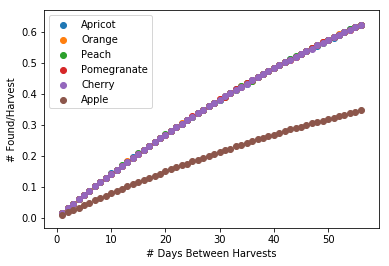

In [189]:
day_list = list(range(1,n_days_harvest+1))
for item in range(4,len(item_list)):
    fig = plt.figure
    plt.scatter(day_list, item_counts[:, item])
plt.legend(['Apricot', 'Orange', 'Peach', 'Pomegranate','Cherry','Apple'])
plt.xlabel('# Days Between Harvests')
plt.ylabel('# Found/Harvest')
plt.show()

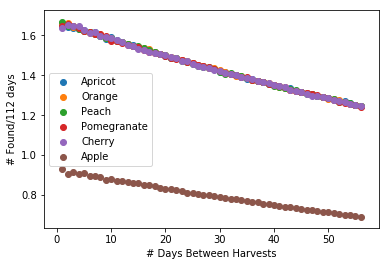

In [190]:
n_days_total = 112
day_list = list(range(1,n_days_harvest+1))
for item in range(4,len(item_list)):
#     fig = plt.figure
    plt.scatter(day_list, item_counts[:, item] * n_days_total/day_list)
plt.legend(['Apricot', 'Orange', 'Peach', 'Pomegranate','Cherry','Apple'])
plt.xlabel('# Days Between Harvests')
plt.ylabel('# Found/{} days'.format(n_days_total))
plt.show()

In [192]:
day_list
item_counts[:,-1]*n_days_total/day_list

array([ 0.932288  ,  0.906416  ,  0.914704  ,  0.904148  ,  0.9089024 ,
        0.89441333,  0.894016  ,  0.889882  ,  0.87542933,  0.8813056 ,
        0.86915055,  0.872872  ,  0.86628554,  0.86172   ,  0.85913707,
        0.851508  ,  0.84962541,  0.84342844,  0.83364547,  0.832048  ,
        0.82852267,  0.82701309,  0.82021983,  0.81207933,  0.8117536 ,
        0.80623631,  0.800016  ,  0.7992    ,  0.79670234,  0.79077227,
        0.7841409 ,  0.779569  ,  0.77883103,  0.77325459,  0.7687328 ,
        0.76528978,  0.76394595,  0.75594105,  0.75520164,  0.7486724 ,
        0.74598283,  0.742096  ,  0.74080447,  0.73431527,  0.73036444,
        0.72653426,  0.72452562,  0.71893967,  0.714656  ,  0.71547616,
        0.70796957,  0.70668338,  0.70140106,  0.69841333,  0.69417396,
        0.692448  ])